<a href="https://colab.research.google.com/github/mz1119/shaker-level-detection-model/blob/main/VIA_JSON_to_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive, allows access to folder in google drive
#for this project, i made a folder in my drive called Blue Hill and worked out of that folder
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import json
from PIL import Image, ImageDraw

In [ ]:
#get dataframe from json
data_frame = pd.read_json('/content/drive/My Drive/Blue Hill/via_project_13Jun2021_18h22m_json.json')
data_frame = data_frame.transpose().reset_index()[['filename','regions']]

In [ ]:
#shortens data_frame for testing
#data_frame = data_frame[0:5] 

In [ ]:
#Level Masks
for row in range(data_frame.shape[0]):
    #get name
    file_name = data_frame['filename'][row]
    #open image
    im = Image.open("/content/drive/My Drive/Blue Hill/Coffee_Shaker_Images/" + file_name).convert("L")
    
    #get size
    width, height = im.size
    
    imgdraw = ImageDraw.Draw(im) 
    imgdraw.rectangle([0,0,width,height], fill = 0, outline = 0) #make whole screen black
    
    #level line part -------------------
    #get points of line
    x_values = data_frame['regions'][row][1]['shape_attributes']['all_points_x']
    y_values = data_frame['regions'][row][1]['shape_attributes']['all_points_y']
    
    #add paired coords to list
    xy_coordinates = []
    for counter in range(len(x_values)):
        xy_coordinates.append([x_values[counter],y_values[counter]])
    
    #add lines
    for counter in range(len(xy_coordinates) - 1):
        shape = [tuple(xy_coordinates[counter]),tuple(xy_coordinates[counter+1])]
        imgdraw.line(shape, fill = 1, width = 3)

  
    im.save("/content/drive/My Drive/Blue Hill/Level_Masks/level_mask_" + file_name[:-4] + "PNG", quality = 95)

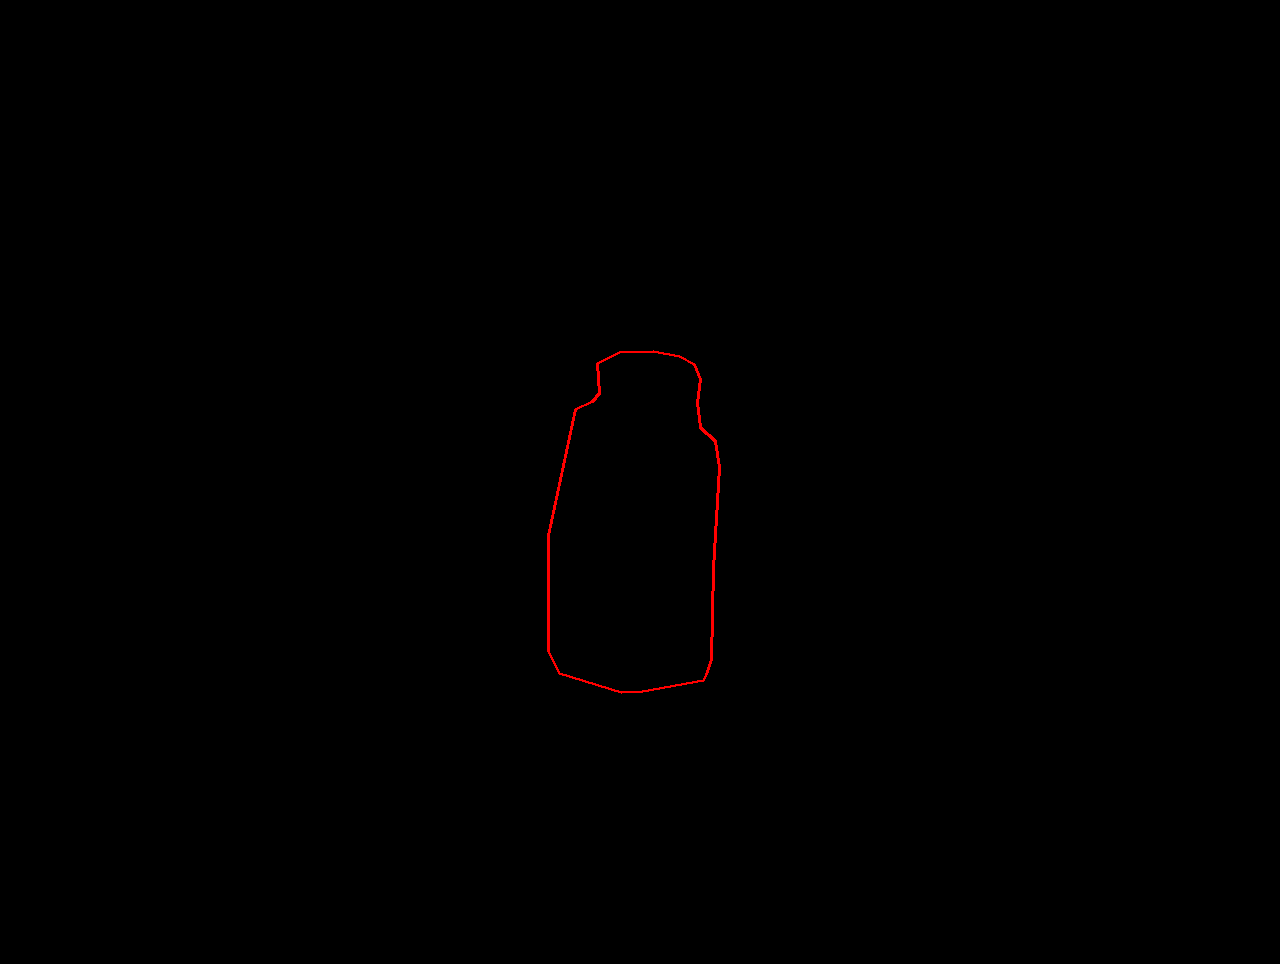

In [ ]:
#Outline Masks
for row in range(data_frame.shape[0]):
    #get name
    file_name = data_frame['filename'][row]
    #open image
    im = Image.open("/content/drive/My Drive/Blue Hill/Coffee_Shaker_Images/" + file_name).convert("L")

    #get size
    width, height = im.size
    
    imgdraw = ImageDraw.Draw(im) 
    imgdraw.rectangle([0,0,width,height], fill = 0, outline = 0) #make whole screen black

    #outline part -----------------
    #get points of lineimg
    x_values = data_frame['regions'][row][0]['shape_attributes']['all_points_x']
    y_values = data_frame['regions'][row][0]['shape_attributes']['all_points_y']
    
    #add paired coords to list
    xy_coordinates = []
    for counter in range(len(x_values)):
        xy_coordinates.append([x_values[counter],y_values[counter]])
    
    #add lines
    for counter in range(len(xy_coordinates) - 1):
        shape = [tuple(xy_coordinates[counter]),tuple(xy_coordinates[counter+1])]
        imgdraw.line(shape,fill = 1,width = 3)
    #last line
    last_connecting_line = [tuple(xy_coordinates[-1]),tuple(xy_coordinates[0])]
    imgdraw.line(last_connecting_line,fill = 1,width = 3)
    
    im.save("/content/drive/My Drive/Blue Hill/Outline_Masks/outline_mask_" + file_name[:-4] + "PNG", quality = 95)


In [ ]:
im.putpalette([
    0, 0, 0, # black background
    255, 0, 0, # index 1 is red
    0, 255, 0, # index 2 is green
])
im